In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import gdp_per_capita data to gdp_df data frame
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

## Analyzing GDP Per Capita Data Frame

In [3]:
#first ten rows
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
#last ten rows
gdp_df[-10:]

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [5]:
#dropping Value Footnotes column
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [6]:
#renaming columns
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [7]:
gdp_df.shape

(7662, 3)

In [8]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [9]:
gdp_df['Year'].describe()

count    7662.000000
mean     2006.388280
std         9.418727
min      1990.000000
25%      1998.000000
50%      2007.000000
75%      2015.000000
max      2022.000000
Name: Year, dtype: float64

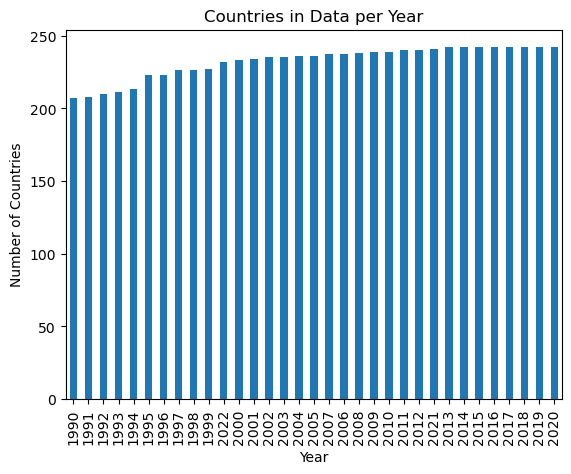

In [10]:
gdp_df['Year'].value_counts()
#I notice that the count generally increases with time... maybe we could plot this. 
#I wonder if this is correlated with the number of countries in the world
year_value_counts = gdp_df['Year'].value_counts(ascending=True)
year_value_counts.plot(kind='bar')
plt.ylabel('Number of Countries')
plt.title('Countries in Data per Year')
plt.show()

In [11]:
print(gdp_df['Country'].unique())
#May need to come back and clean this up...

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Arab World'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' "CÃ´te d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Caribbean small states'
 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'CuraÃ§ao' 'Cyprus' 'Czechia'
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Euro area'
 'Europe & Central Asia' '

 ## Analyzing GDP Per Capita for 1990 and 2021

In [12]:
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


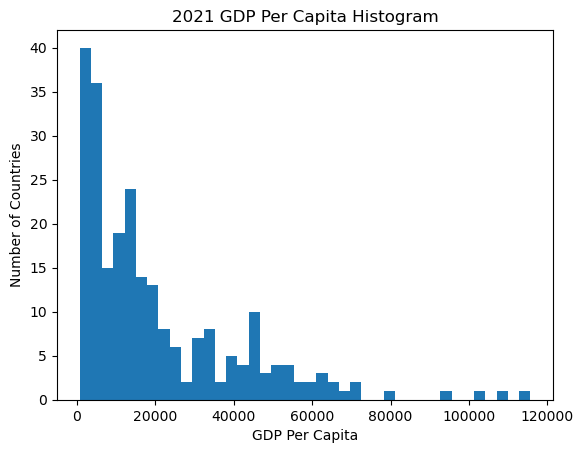

In [13]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins=40)
plt.title('2021 GDP Per Capita Histogram')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')
plt.show()
#I would descibe this as a very right-skewed distribution! 
#The majority of countries have a GDP per cap < 20,000

In [14]:
#top five and bottom five countries sorted by GDP Per Capita
print(gdp_2021.sort_values('GDP_Per_Capita'))

                       Country  Year  GDP_Per_Capita
972                    Burundi  2021      714.066712
1216  Central African Republic  2021      837.504686
1629           Dem. Rep. Congo  2021     1073.643271
6272                   Somalia  2021     1136.735989
5073                     Niger  2021     1186.576809
...                        ...   ...             ...
680                    Bermuda  2021    78570.489515
5745                     Qatar  2021    92862.571798
3278                   Ireland  2021   102785.490239
6107                 Singapore  2021   107741.118436
4147                Luxembourg  2021   115683.493708

[241 rows x 3 columns]


In [15]:
#Now back to the full gdp_df, just going to look at years 1990 and 2021
gdp_df_filtered = gdp_df[gdp_df['Year'].isin([1990,2021])]
gdp_pivoted = gdp_df_filtered.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita')
gdp_pivoted = gdp_pivoted.dropna()
print(gdp_pivoted)

Year                                1990          2021
Country                                               
Africa Eastern and Southern  3037.297466   3519.174840
Africa Western and Central   2788.301039   4014.607965
Albania                      4827.027705  14595.944386
Algeria                      8828.874473  11029.138782
Angola                       5793.084512   5911.835657
...                                  ...           ...
Vanuatu                      2774.138350   2800.493866
Viet Nam                     2099.394649  10628.219166
World                        9705.981267  17055.357429
Zambia                       2290.039226   3236.788981
Zimbabwe                     2704.757299   2115.144555

[206 rows x 2 columns]


In [16]:
#add percent change column to compare 1990 and 2021 GDP Per Capita
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2021]-gdp_pivoted[1990])/(gdp_pivoted[1990]))
print(gdp_pivoted)

Year                                1990          2021  Percent_Change
Country                                                               
Africa Eastern and Southern  3037.297466   3519.174840       15.865334
Africa Western and Central   2788.301039   4014.607965       43.980435
Albania                      4827.027705  14595.944386      202.379544
Algeria                      8828.874473  11029.138782       24.921232
Angola                       5793.084512   5911.835657        2.049878
...                                  ...           ...             ...
Vanuatu                      2774.138350   2800.493866        0.950043
Viet Nam                     2099.394649  10628.219166      406.251608
World                        9705.981267  17055.357429       75.720074
Zambia                       2290.039226   3236.788981       41.342076
Zimbabwe                     2704.757299   2115.144555      -21.799100

[206 rows x 3 columns]


In [17]:
#How many countries experienced a negative percent change from 1990 to 2021?
gdp_pivoted_neg_change = gdp_pivoted[gdp_pivoted['Percent_Change']<0]
gdp_pivoted_neg_change['Percent_Change'].describe()
#18 countries experienced a negative percent change

count    19.000000
mean    -17.928420
std      13.029634
min     -39.236385
25%     -26.021350
50%     -18.043873
75%      -6.349968
max      -0.172662
Name: Percent_Change, dtype: float64

In [18]:
#looking for top two countries with increase in GDP Per Cap from 1990 to 2021
gdp_pivoted_pos_change=gdp_pivoted[gdp_pivoted['Percent_Change']>=0]
gdp_pivoted_pos_change = gdp_pivoted_pos_change.sort_values(by='Percent_Change', ascending=False)
print(gdp_pivoted_pos_change.iloc[:2])

Year                      1990          2021  Percent_Change
Country                                                     
Equatorial Guinea   936.419751  14637.007350     1463.081870
China              1423.896348  17657.495181     1140.082904


In [19]:
highest_percent_change_country=gdp_pivoted_pos_change.index[0]
second_highest_percent_change_country=gdp_pivoted_pos_change.index[1]
highest_pct_df = gdp_df[gdp_df['Country']==highest_percent_change_country]
second_highest_pct_df = gdp_df[gdp_df['Country']==second_highest_percent_change_country]
highest_pct_df

,Country,Year,GDP_Per_Capita
2001,Equatorial Guinea,2022,14732.917816
2002,Equatorial Guinea,2021,14637.007350
2003,Equatorial Guinea,2020,15132.379974
2004,Equatorial Guinea,2019,16240.369810
2005,Equatorial Guinea,2018,17764.969630
2006,Equatorial Guinea,2017,19617.844705
2007,Equatorial Guinea,2016,21566.057048
2008,Equatorial Guinea,2015,24563.500604
2009,Equatorial Guinea,2014,28106.198389
2010,Equatorial Guinea,2013,29143.021802


Text(0, 0.5, 'GDP Per Capita')

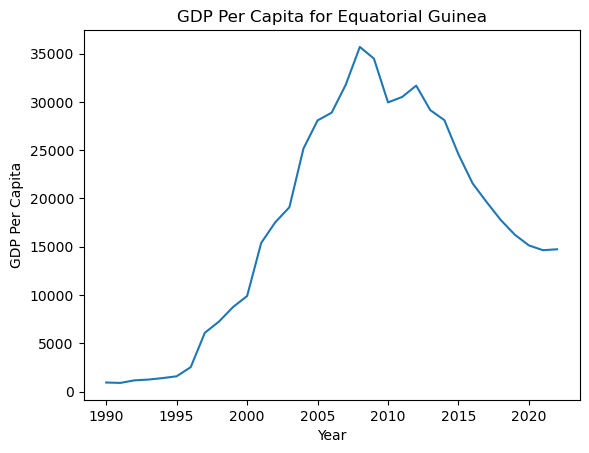

In [20]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita') #Is this in USD? How can we find out?

Text(0, 0.5, 'GDP Per Capita')

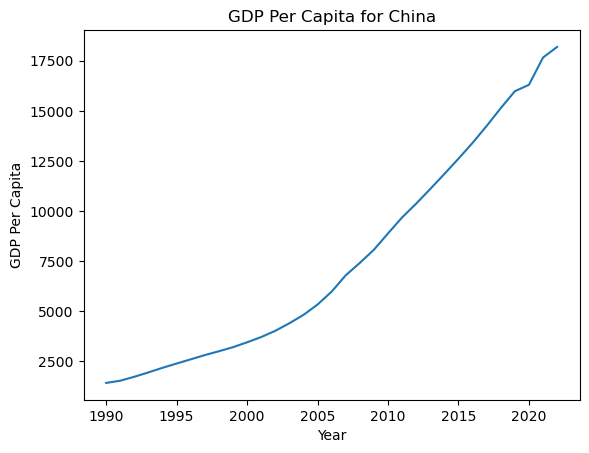

In [21]:
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'])
plt.title('GDP Per Capita for ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

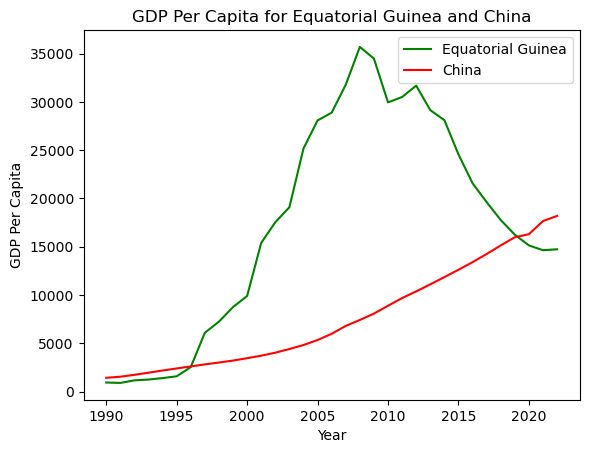

In [22]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'], color='Green', label=highest_percent_change_country)
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'], color='Red', label=second_highest_percent_change_country)
plt.title('GDP Per Capita for ' + highest_percent_change_country + ' and ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend()
plt.show()

## GDP Per Capita Across Continents

In [23]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [24]:
gdp_df = pd.merge(gdp_df, continents, on='Country')
print(gdp_df)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2021     1517.016266      Asia
1     Afghanistan  2020     1968.341002      Asia
2     Afghanistan  2019     2079.921861      Asia
3     Afghanistan  2018     2060.698973      Asia
4     Afghanistan  2017     2096.093111      Asia
...           ...   ...             ...       ...
5888     Zimbabwe  1994     2670.106615    Africa
5889     Zimbabwe  1993     2458.783255    Africa
5890     Zimbabwe  1992     2468.278257    Africa
5891     Zimbabwe  1991     2781.787843    Africa
5892     Zimbabwe  1990     2704.757299    Africa

[5893 rows x 4 columns]


Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


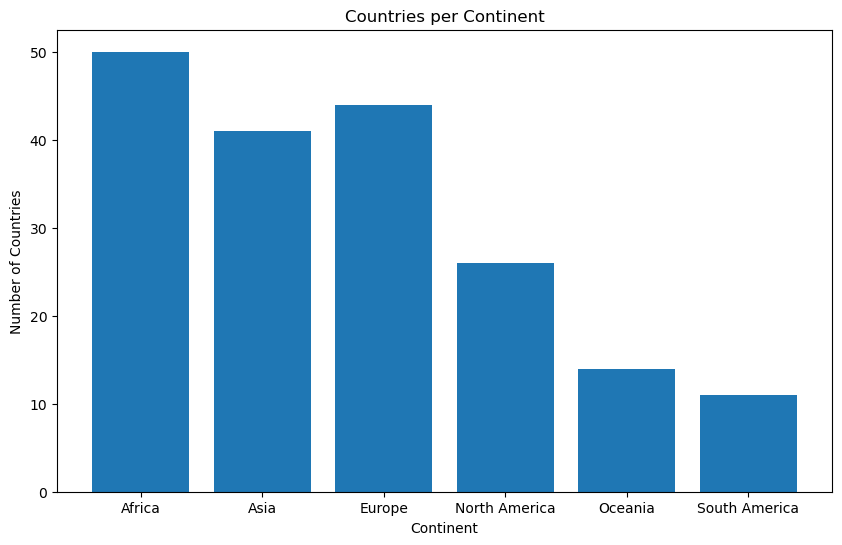

In [25]:
#The following line is not intuitive to me. Is there a better way to think about this?
unique_continent_counts = gdp_df['Country'].groupby(gdp_df['Continent']).nunique()
print(unique_continent_counts)
plt.figure(figsize=(10,6))
plt.bar(unique_continent_counts.index, unique_continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

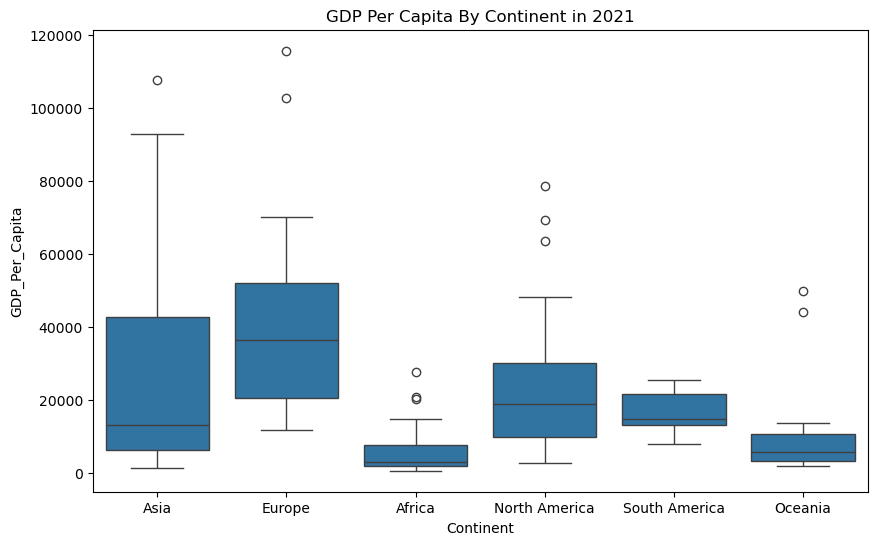

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gdp_df[gdp_df['Year']==2021], x='Continent', y='GDP_Per_Capita')
plt.title('GDP Per Capita By Continent in 2021')
plt.show()

## Life Expectancy Data

In [53]:
#Now we read in the life expectancy data
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4) #first four rows don't have anything we care about
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [54]:
#cleaning up life expectancy data frame to fit our other data frames
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code','Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name':'Country','variable':'Year', 'value':'Life_Expectancy'})
    .dropna() #Dropping all missing values for Life_Expectancy.
)
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


In [59]:
#First country with life expectancy > 80?
ovr80 = life_expectancy[life_expectancy['Life_Expectancy']>80]
ovr80 = ovr80.sort_values('Year')
print(ovr80['Country'].iloc[0] + ' was the first country to exceed a life expectancy of 80 in ' + ovr80['Year'].iloc[0] + '!')

Japan was the first country to exceed a life expectancy of 80 in 1996!


In [60]:
#merging gdp_df and life_expectancy data frames
life_expectancy['Year'] = life_expectancy['Year'].astype(int) #convert year object to int
gdp_le = pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'])
gdp_le = gdp_le.sort_values(['Country','Year'])
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
19,Afghanistan,2002,1280.463171,Asia,56.454
18,Afghanistan,2003,1292.333437,Asia,57.344
17,Afghanistan,2004,1260.060581,Asia,57.944
16,Afghanistan,2005,1352.320627,Asia,58.361
15,Afghanistan,2006,1366.993146,Asia,58.684
...,...,...,...,...,...
5475,Zimbabwe,2018,2399.621551,Africa,61.414
5474,Zimbabwe,2019,2203.396810,Africa,61.292
5473,Zimbabwe,2020,1990.319419,Africa,61.124
5472,Zimbabwe,2021,2115.144555,Africa,59.253


In [36]:
#Just looking at 2021
gdp_le_2021=gdp_le[gdp_le['Year']==2021]
gdp_le_2021_grth80 = gdp_le_2021[gdp_le_2021['Life_Expectancy']>80]
gdp_le_2021_grth80.describe()
#31 countries have a life exp greater than 80 in 2021

,Year,GDP_Per_Capita,Life_Expectancy
count,31.0,31.000000,31.000000
mean,2021.0,54979.098284,82.304566
std,0.0,20645.577965,1.350073
min,2021.0,29548.038910,80.082927
25%,2021.0,42232.509225,81.343902
50%,2021.0,49774.340702,82.324390
75%,2021.0,59000.049986,83.128049
max,2021.0,115683.493708,85.532683


In [41]:
#finding the top three highest GDP Per Capita countries
gdp_le_2021=gdp_le_2021.sort_values('GDP_Per_Capita', ascending=False)
print(gdp_le_2021[:10])
fir_highest_GDP_2021=gdp_le_2021['Country'].iloc[0]
sec_highest_GDP_2021=gdp_le_2021['Country'].iloc[1]
thd_highest_GDP_2021=gdp_le_2021['Country'].iloc[2]
top_three_highest_gdp_2021_countries = [fir_highest_GDP_2021, sec_highest_GDP_2021, thd_highest_GDP_2021]

                   Country  Year  GDP_Per_Capita      Continent  \
2857            Luxembourg  2021   115683.493708         Europe   
4364             Singapore  2021   107741.118436           Asia   
2285               Ireland  2021   102785.490239         Europe   
4082                 Qatar  2021    92862.571798           Asia   
581                Bermuda  2021    78570.489515  North America   
4796           Switzerland  2021    70097.368753         Europe   
5212  United Arab Emirates  2021    69733.793774           Asia   
1001        Cayman Islands  2021    69400.666661  North America   
3717                Norway  2021    65909.003030         Europe   
2890      Macao SAR, China  2021    64796.995137           Asia   

      Life_Expectancy  
2857        82.597561  
4364        83.092683  
2285        82.353659  
4082        79.272000  
581         79.280000  
4796        83.751220  
5212        78.710000  
1001        82.009756  
3717        83.163415  
2890        85.399000 

In [62]:
top_three = gdp_le[gdp_le['Country'].isin(top_three_highest_gdp_2021_countries)]
print(top_three)

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2316    Ireland  1990    26781.627609    Europe        74.846073
2315    Ireland  1991    27141.920541    Europe        75.025000
2314    Ireland  1992    27858.632081    Europe        75.415098
2313    Ireland  1993    28466.114894    Europe        75.292195
2312    Ireland  1994    29986.140304    Europe        75.787122
...         ...   ...             ...       ...              ...
4367  Singapore  2018    98280.042373      Asia        83.297561
4366  Singapore  2019    98455.328233      Asia        83.595122
4365  Singapore  2020    94910.101431      Asia        83.543902
4364  Singapore  2021   107741.118436      Asia        83.092683
4363  Singapore  2022   108036.110993      Asia        82.895122

[99 rows x 5 columns]


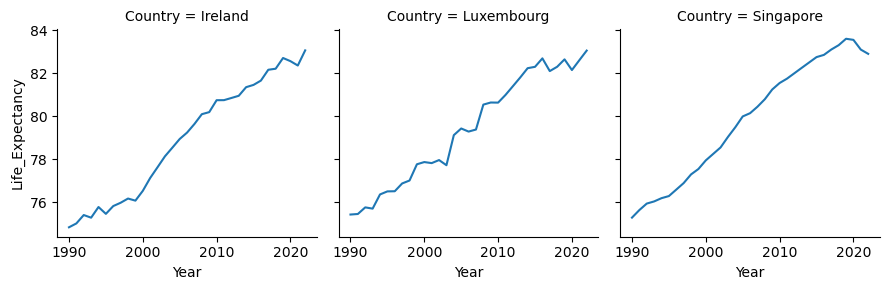

In [64]:
top_three_graph = sns.FacetGrid(top_three, col='Country')
top_three_graph.map(sns.lineplot, "Year", 'Life_Expectancy')
plt.show()

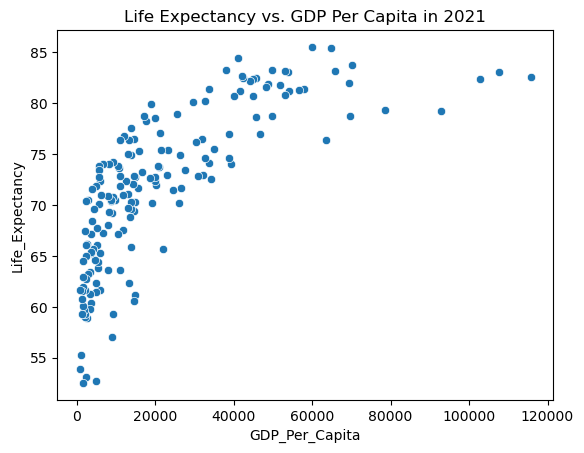

In [63]:
sns.scatterplot(data=gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP Per Capita in 2021')
plt.show()

In [48]:
corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print('2021 GDP per capita and life expectancy correlation = ' + str(corr_le_gdp_2021))

2021 GDP per capita and life expectancy correlation = 0.7450812403297987


2021 GDP per capita (log scale) and life expectancy correlation = 0.846574979726186


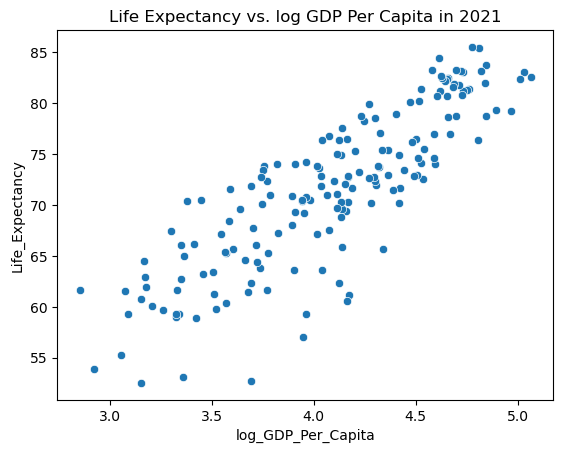

In [66]:
#log scale
gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log10)
log_corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['log_GDP_Per_Capita'])
print('2021 GDP per capita (log scale) and life expectancy correlation = ' + str(log_corr_le_gdp_2021))
sns.scatterplot(data=gdp_le_2021, x='log_GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. log GDP Per Capita in 2021')
plt.show()

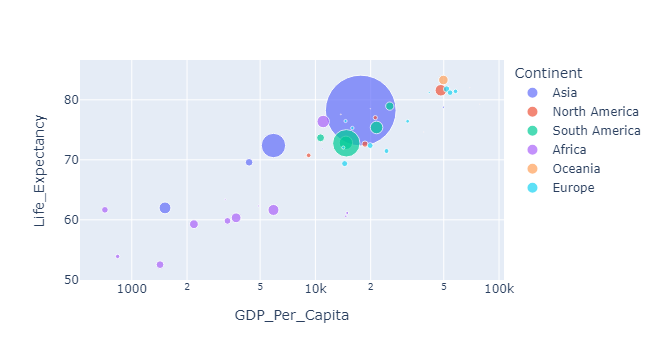

In [101]:
import plotly.express as px
population = pd.read_csv('../data/population.csv')
population = population.rename(columns={'Country or Area': 'Country', 'Year(s)':'Year', 'Value':'Population', 'Variant':'Pop_Variant'})
gdp_le_pop = pd.merge(gdp_le, population, on=['Country','Year'])
gdp_le_pop_med = gdp_le_pop[gdp_le_pop['Pop_Variant']=='Medium']
gdp_le_pop_med = gdp_le_pop_med.sort_values('Year')
fig = px.scatter(gdp_le_pop_med.query("Year==2021"), x="GDP_Per_Capita", y="Life_Expectancy", size="Population", color="Continent",
           hover_name="Country", log_x=True, size_max=50)
fig.show()


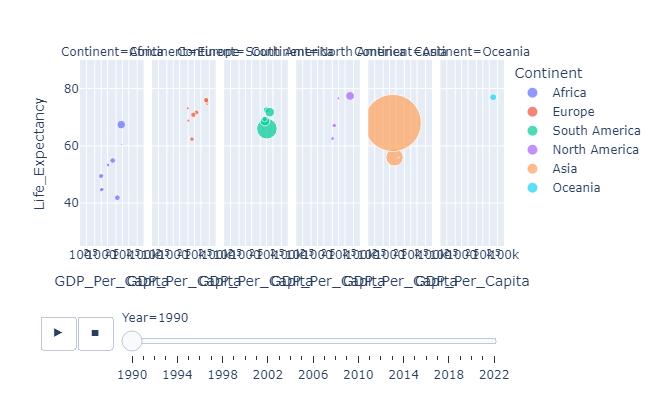

In [100]:
fig2 = px.scatter(gdp_le_pop_med, x="GDP_Per_Capita", y="Life_Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Continent", hover_name="Country", facet_col="Continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], width = 600, height=400)
fig2.show()